In [1]:
%pip install pandas
%pip install tabula-py
%pip install rdflib
%pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
import os
import tabula
import pandas as pd
import rdflib
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot
import re

directory = 'data/uk'

pdf_files = [f for f in os.listdir(directory) if f.endswith('.pdf')]

for pdf_file in pdf_files:
    pdf_file_name = re.sub('.pdf', '', pdf_file)
    file_path = os.path.join(directory, pdf_file)
    tabula.convert_into(file_path, f"{directory}/{pdf_file_name}.csv", output_format="csv", pages='all')
    print(f"Converted {pdf_file} to csv")


Converted ufo_report_2008.pdf to csv
Converted UFOReport1999.pdf to csv
Converted UFOReports2003WholeoftheUK.pdf to csv
Converted UFOReport2000.pdf to csv
Converted UFOReports2006WholeoftheUK.pdf to csv
Converted UFOReports2002WholeoftheUK.pdf to csv
Converted ufo_report_2007.pdf to csv
Converted ufo_report_2009.pdf to csv
Converted UFOReports2005WholeoftheUK.pdf to csv
Converted ufo_report_1997.pdf to csv
Converted UFOReport2001.pdf to csv
Converted UFOReports2004WholeoftheUK.pdf to csv
Converted UFOReport1998.pdf to csv


In [50]:
import os
import pandas as pd
import re

directory = 'data/uk'
all_csv_files = [f for f in os.listdir(directory) if re.search(r'\.csv$', f)]

# Initialize an empty DataFrame to store combined data
combined_csv_data = pd.DataFrame()

# Define the new column names
new_column_names = ['date', 'time', 'city', 'area', 'occupation of reporter', 'description']

# Define a function to map old column names to new column names based on patterns
def rename_columns(columns):
    column_mapping = {
        re.compile(r'date', re.IGNORECASE): 'date',
        re.compile(r'time', re.IGNORECASE): 'time',
        re.compile(r'(town|village|city)', re.IGNORECASE): 'city',
        re.compile(r'county|area', re.IGNORECASE): 'area',
        re.compile(r'occupation', re.IGNORECASE): 'occupation of reporter',
        re.compile(r'description', re.IGNORECASE): 'description'
    }
    new_columns = []
    for col in columns:
        for pattern, new_name in column_mapping.items():
            if pattern.search(col):
                new_columns.append(new_name)
                break
        else:
            new_columns.append(col)  # Keep the original column name if no pattern matches

    # Ensure the columns are unique
    unique_columns = []
    seen = set()
    for col in new_columns:
        if col in seen:
            counter = 1
            new_col = f"{col}_{counter}"
            while new_col in seen:
                counter += 1
                new_col = f"{col}_{counter}"
            unique_columns.append(new_col)
            seen.add(new_col)
        else:
            unique_columns.append(col)
            seen.add(col)

    return unique_columns

# Iterate over each CSV file and concatenate them into one DataFrame
for csv_file in all_csv_files:
    file_path = os.path.join(directory, csv_file)
    try:
        temp_df = pd.read_csv(file_path, on_bad_lines='skip')
        temp_df.columns = rename_columns(temp_df.columns)  # Rename the columns
        # Drop unnamed columns
        temp_df = temp_df.loc[:, ~temp_df.columns.str.contains('^Unnamed')]
        combined_csv_data = pd.concat([combined_csv_data, temp_df], ignore_index=True)
    except pd.errors.ParserError as e:
        print(f"Error parsing {file_path}: {e}")
    except Exception as e:
        print(f"An unexpected error occurred with {file_path}: {e}")

# Add the 'country' column with the value 'UK' for all rows
combined_csv_data['country'] = 'UK'
combined_csv_data = combined_csv_data[['date', 'time', 'city', 'area', 'country', 'description']]

# Save the combined data into a single CSV file
combined_csv_data.to_csv(os.path.join('data', 'uk_ufo_sightings.csv'), index=False)
print("All CSV files have been combined into one CSV file.")


All CSV files have been combined into one CSV file.


In [48]:
uk = pd.read_csv('data/uk_ufo_sightings.csv')
uk.head()

,date,time,city,area,country,occupation of reporter,description
0,01-Jan-00,07:30,Tenbury Wells,Shropshire,UK,NaN,"A cigar shaped object. Grey in colour, with tw..."
1,03-Jan-00,20:45,Evanton,Ross-Shire,UK,NaN,"A gold disc was seen. It flew through cloud, r..."
2,04-Jan-00,00:30,Erdingham/Birmingham,West Midlands,UK,NaN,"One large, triangular shaped object. There wer..."
3,05-Jan-00,01:20,Wootton Bassett,Wiltshire,UK,NaN,One single object. Changed from white to green...
4,09-Jan-00,02:45,Runcorn,Cheshire,UK,NaN,"One round, golf ball shaped object. Orange and..."


In [51]:

us = pd.read_csv('data/us_ufo_sightings.csv')
us.head(10)

,date_time,city_area,state,country,ufo_shape,encounter_length,described_encounter_length,description,date_documented,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180.0,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000
7,10/10/1965 23:45,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.117500,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180.0,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.586111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120.0,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.294722,-82.984167


In [65]:

uk = pd.concat([pd.read_csv(f"{directory}/{f}") for f in os.listdir(directory) if f.endswith('.csv')])
uk.head()

,Date,Time,Town / Village,Area,Occupation\r(Where Relevant),Description
0,Jan-09,Not Given,Warwick,Warwickshire,Air Traffic Control\remployee,An orange glowing object with a red light on t...
1,Jan-09,Not Given,Not Given,North Yorkshire,NaN,"Very curious. A very bright light, four times ..."
2,Jan-09,Not Given,Carterton,Oxfordshire,Air Traffic Control\remployee,A very bright constant red light.
3,Jan-09,Not Given,High Wycombe,Buckinghamshire,NaN,been outside the individuals house for some ni...
4,Jan-09,Not Given,Sawtry,Cambridgeshire,NaN,A UFO.


In [66]:

uk = pd.concat([pd.read_csv(f"{directory}/{f}") for f in os.listdir(directory) if f.endswith('.csv')])

graph = rdflib.Graph()

# Add uk to graph with columns Date / Time /Area/ Description
for index, row in uk.head(10).iterrows():
    subject = rdflib.URIRef(f"https://example.com/uk/ufo_sighting/{index}")
    graph.add((subject, rdflib.RDF.type, rdflib.URIRef("https://example.com/uk/ufo_sighting")))
    graph.add((subject, rdflib.URIRef("https://example.com/uk/date"), rdflib.Literal(row['Date'])))
    graph.add((subject, rdflib.URIRef("https://example.com/uk/time"), rdflib.Literal(row['Time'])))
    graph.add((subject, rdflib.URIRef("https://example.com/uk/area"), rdflib.Literal(row['Area'])))
    graph.add((subject, rdflib.URIRef("https://example.com/uk/description"), rdflib.Literal(row['Description'])))
print(graph.serialize(format='turtle'))
# uk.head()



@prefix ns1: <https://example.com/uk/> .

<https://example.com/uk/ufo_sighting/0> a ns1:ufo_sighting ;
    ns1:area "Warwickshire" ;
    ns1:date "Jan-09" ;
    ns1:description "An orange glowing object with a red light on the right-hand side." ;
    ns1:time "Not Given" .

<https://example.com/uk/ufo_sighting/1> a ns1:ufo_sighting ;
    ns1:area "North Yorkshire" ;
    ns1:date "Jan-09" ;
    ns1:description "Very curious. A very bright light, four times that of a star." ;
    ns1:time "Not Given" .

<https://example.com/uk/ufo_sighting/2> a ns1:ufo_sighting ;
    ns1:area "Oxfordshire" ;
    ns1:date "Jan-09" ;
    ns1:description "A very bright constant red light." ;
    ns1:time "Not Given" .

<https://example.com/uk/ufo_sighting/3> a ns1:ufo_sighting ;
    ns1:area "Buckinghamshire" ;
    ns1:date "Jan-09" ;
    ns1:description "been outside the individuals house for some nights and then one\rnight." ;
    ns1:time "Not Given" .

<https://example.com/uk/ufo_sighting/4> a ns1:ufo_s

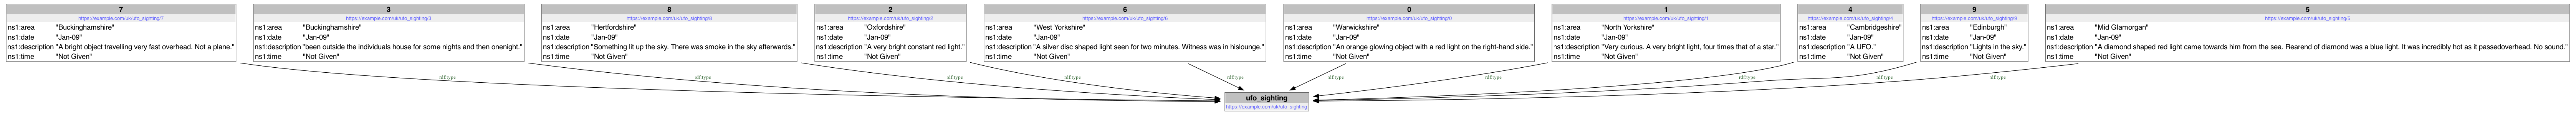

In [67]:
stream = io.StringIO()
rdf2dot(graph, stream, opts = {display})
dg = pydotplus.graph_from_dot_data(stream.getvalue())
png = dg.create_png()
display(Image(png))

In [4]:
from rdflib import Graph, Namespace, Literal, RDF, RDFS, XSD
import pandas as pd
from datetime import datetime

# Create an RDF graph
g = Graph()

# Define Namespace
ufo = Namespace("https://example.org/ufo/")


us = us[:5]

# Define RDF schema and add to the graph
g.bind("ufo", ufo)

# Define RDF Turtle data
rdfttl = """
@prefix ufo: <https://example.org/ufo/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

# Define classes
ufo:Sighting rdf:type rdfs:Class .
ufo:Location rdf:type rdfs:Class .
ufo:Country rdf:type rdfs:Class .
ufo:State rdf:type rdfs:Class .
ufo:City rdf:type rdfs:Class .
ufo:UFOShape rdf:type rdfs:Class .
ufo:Time rdf:type rdfs:Class .
ufo:Date rdf:type rdfs:Class .
ufo:Person rdf:type rdfs:Class .
ufo:Witness rdf:type rdfs:Class .

# Define subclass relationships
ufo:UFO rdfs:subClassOf ufo:Sighting .
ufo:Location rdfs:subClassOf ufo:Sighting .
ufo:Country rdfs:subClassOf ufo:Location .
ufo:State rdfs:subClassOf ufo:Location .
ufo:City rdfs:subClassOf ufo:Location .
ufo:UFOShape rdfs:subClassOf rdf:Property .
ufo:Time rdfs:subClassOf rdf:Property .
ufo:Date rdfs:subClassOf ufo:Time .
ufo:Person rdfs:subClassOf rdf:Property .
ufo:Witness rdfs:subClassOf ufo:Person .

# Define properties and their domains/ranges
ufo:date rdf:type rdf:Property ;
    rdfs:domain ufo:Sighting ;
    rdfs:range xsd:date .

ufo:time rdf:type rdf:Property ;
    rdfs:domain ufo:Sighting ;
    rdfs:range xsd:time .

ufo:location rdf:type rdf:Property ;
    rdfs:domain ufo:Sighting ;
    rdfs:range ufo:Location .

ufo:ufo_shape rdf:type rdf:Property ;
    rdfs:domain ufo:Sighting ;
    rdfs:range ufo:UFOShape .

ufo:encounter_length rdf:type rdf:Property ;
    rdfs:domain ufo:Sighting ;
    rdfs:range xsd:float .

ufo:description rdf:type rdf:Property ;
    rdfs:domain ufo:Sighting ;
    rdfs:range xsd:string .

ufo:date_documented rdf:type rdf:Property ;
    rdfs:domain ufo:Sighting ;
    rdfs:range xsd:date .

ufo:latitude rdf:type rdf:Property ;
    rdfs:domain ufo:Location ;
    rdfs:range xsd:float .

ufo:longitude rdf:type rdf:Property ;
    rdfs:domain ufo:Location ;
    rdfs:range xsd:float .
"""

# Parse RDF Turtle data
g.parse(data=rdfttl, format="turtle")

# Iterate over rows in the DataFrame and add individual instances to the graph
for idx, row in us.iterrows():
    # Create unique URIs for each sighting and location
    sighting_uri = ufo[f"Sighting{idx+1}"]
    location_uri = ufo[f"Location{idx+1}"]  # Adjust as needed for URI creation
    
    # Convert date and time strings to RDF-compatible formats
    try:
        parsed_date = datetime.strptime(row['date_documented'], '%m/%d/%Y').date().isoformat()
    except ValueError:
        parsed_date = None
    
    if parsed_date:
        g.add((sighting_uri, RDF.type, ufo.Sighting))
        g.add((sighting_uri, ufo.date_documented, Literal(parsed_date, datatype=XSD.date)))
        g.add((sighting_uri, ufo.location, location_uri))  # Connect sighting to its location
        g.add((location_uri, RDF.type, ufo.Location))
        g.add((location_uri, ufo.country, Literal(row['country'], datatype=XSD.string)))
        if row['state']:
            g.add((location_uri, ufo.state, Literal(row['state'], datatype=XSD.string)))
        g.add((location_uri, ufo.latitude, Literal(row['latitude'], datatype=XSD.float)))
        g.add((location_uri, ufo.longitude, Literal(row['longitude'], datatype=XSD.float)))

# Serialize the graph to TTL and print or save it if needed
print(g.serialize(format="turtle"))



@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix ufo: <https://example.org/ufo/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ufo:City a rdfs:Class ;
    rdfs:subClassOf ufo:Location .

ufo:Country a rdfs:Class ;
    rdfs:subClassOf ufo:Location .

ufo:Date a rdfs:Class ;
    rdfs:subClassOf ufo:Time .

ufo:Location a rdfs:Class ;
    rdfs:subClassOf ufo:Sighting .

ufo:Person a rdfs:Class ;
    rdfs:subClassOf rdf:Property .

ufo:Sighting a rdfs:Class .

ufo:State a rdfs:Class ;
    rdfs:subClassOf ufo:Location .

ufo:Time a rdfs:Class ;
    rdfs:subClassOf rdf:Property .

ufo:UFOShape a rdfs:Class ;
    rdfs:subClassOf rdf:Property .

ufo:Witness a rdfs:Class ;
    rdfs:subClassOf ufo:Person .

ufo:Sighting1 a ufo:Sighting ;
    ufo:date_documented "2004-04-27"^^xsd:date ;
    ufo:location ufo:Location1 .

ufo:Sighting2 a ufo:Sighting ;
    ufo:date_documented "2005-12-16"^^xsd:date ;
    ufo:locatio

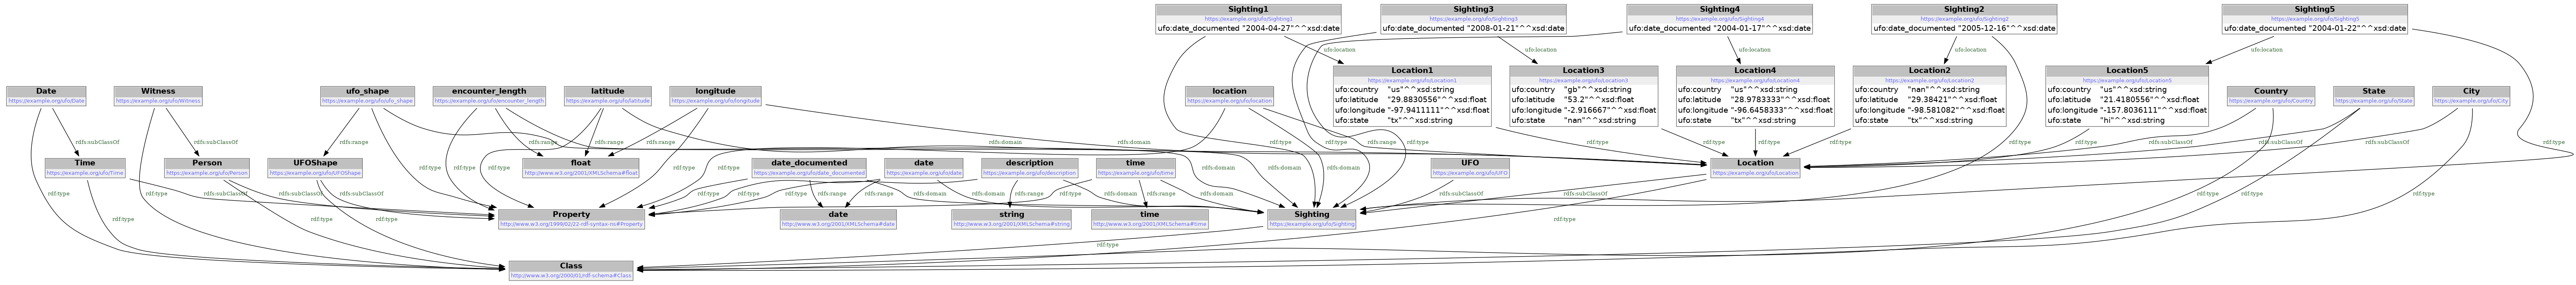

In [5]:
# Generate the graph visualization
from rdflib.tools.rdf2dot import rdf2dot
import io
import pydotplus
from IPython.display import display, Image

stream = io.StringIO()
rdf2dot(g, stream, opts={})
dg = pydotplus.graph_from_dot_data(stream.getvalue())
png = dg.create_png()

# Display the graph
display(Image(png))
